In [136]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from matplotlib import dates
from sklearn.metrics import *
import collections
from copy import deepcopy
pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))


In [137]:
ts_results, cluster_info = pickle.load(open('ts_results_extra.pb','rb'))
ts_results.keys()

dict_keys(['00EABED2-271D-49D8-B599-1D4A09240601', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0A986513-7828-4D53-AA1F-E02D6DF9561B', '0BFC35E2-4817-4865-BFA7-764742302A2D', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '11B5EC4D-4133-4289-B475-4E737182A406', '136562B6-95B2-483D-88DC-065F28409FD2', '1538C99F-BA1E-4EFB-A949-6C7C47701B20', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '24E40C4C-A349-4F9F-93AB-01D00FB994AF', '27E04243-B138-4F40-A164-F40B60165CF3', '2C32C23E-E30C-498A-8DD2-0EFB9150A02E', '33A85C34-CFE4-4732-9E73-0A7AC861B27A', '3600D531-0C55-44A7-AE95-A7A38519464E', '40E170A7-607B-4578-AF04-F021C3B0384A', '481F4DD2-7689-43B9-A2AA-C8772227162B', '4E98F91F-4654-42EF-B908-A3389443F2E7', '4FC32141-E888-4BFF-8804-12559A491D8C', '5119D0F8-FCA8-4184-A4EB-19421A40DE0D', '5152A2DF-FAF3-4BA8-9CA9-E66B32671A53', '59818CD2-24D7-4D32-B133-24C2FE3801E5', '59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2', '5EF64122-B513-46AE-BCF1-E62AAC285D2C', '61359772-D8D8-480D-B623-7C63

In [138]:
for user_id in ts_results.keys():
    ts_results[user_id]['start_timestamp'] = ts_results[user_id]['start_timestamp'].astype(int)
    ts_results[user_id]['next_start_timestamp'] = ts_results[user_id]['next_start_timestamp'].astype(int)
    ts_results[user_id]['end_timestamp'] = ts_results[user_id]['end_timestamp'].astype(int)


In [139]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601']

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id
0,1444079160,1444079220,1444079400,15
1,1444079220,1444079280,1444079460,15
2,1444079280,1444079340,1444079520,15
3,1444079340,1444079400,1444079580,15
4,1444079400,1444079460,1444079640,15
...,...,...,...,...
2076,1444704900,1444704960,1444705140,4
2077,1444704960,1444705020,1444705200,4
2078,1444705020,1444705080,1444705260,4
2079,1444705080,1444705140,1444705320,4


In [140]:
cluster_info = cluster_info.reset_index()
cluster_info.columns = ['cluster_id','_','__','cluster_name']
for user_id in ts_results.keys():
    ts_results[user_id] = pd.merge(ts_results[user_id], cluster_info[['cluster_id','cluster_name']],on='cluster_id', how='left')
    ts_results[user_id]['context'] = ts_results[user_id]['cluster_name'].apply(lambda x: x.split(":")[-1])

In [141]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601']

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id,cluster_name,context
0,1444079160,1444079220,1444079400,15,15:Commuting,Commuting
1,1444079220,1444079280,1444079460,15,15:Commuting,Commuting
2,1444079280,1444079340,1444079520,15,15:Commuting,Commuting
3,1444079340,1444079400,1444079580,15,15:Commuting,Commuting
4,1444079400,1444079460,1444079640,15,15:Commuting,Commuting
...,...,...,...,...,...,...
2076,1444704900,1444704960,1444705140,4,4:Relaxing,Relaxing
2077,1444704960,1444705020,1444705200,4,4:Relaxing,Relaxing
2078,1444705020,1444705080,1444705260,4,4:Relaxing,Relaxing
2079,1444705080,1444705140,1444705320,4,4:Relaxing,Relaxing


In [142]:
df_gt = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/df_gt.csv')
df_gt.start_time = df_gt.start_time.astype(int)
df_gt.end_time = df_gt.end_time.astype(int)
df_gt.head()

,id,task_url,start_time,end_time,context,total_time,st_time,ed_time
0,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444252413,1444252414,Commuting,1.0,2015-10-07 21:13:33,2015-10-07 21:13:34
1,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444233469,1444233949,Commuting,480.0,2015-10-07 15:57:49,2015-10-07 16:05:49
2,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444249194,1444249195,InAMeeting,1.0,2015-10-07 20:19:54,2015-10-07 20:19:55
3,00EABED2-271D-49D8-B599-1D4A09240601,07ac640a-2015-10-08,1444348050,1444373701,Sleeping,25651.0,2015-10-08 23:47:30,2015-10-09 06:55:01
4,00EABED2-271D-49D8-B599-1D4A09240601,07ac640a-2015-10-08,1444341046,1444341047,Sleeping,1.0,2015-10-08 21:50:46,2015-10-08 21:50:47


In [143]:
df_gt[df_gt['id']=='1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842']['st_time'].unique()

array(['2015-08-31 16:26:38', '2015-09-01 00:48:19',
       '2015-09-01 04:23:41', '2015-08-31 22:20:59',
       '2015-09-01 00:24:16', '2015-08-31 19:24:15',
       '2015-08-31 10:41:09', '2015-09-01 01:50:31',
       '2015-08-31 07:03:43', '2015-08-31 20:35:30',
       '2015-09-01 04:51:02', '2015-09-01 01:00:01',
       '2015-08-31 18:03:24', '2015-08-31 20:15:28',
       '2015-08-31 22:01:44', '2015-08-31 09:13:07',
       '2015-08-31 19:40:30', '2015-08-31 21:47:00',
       '2015-08-31 17:53:13', '2015-08-31 23:51:03',
       '2015-08-27 02:31:43', '2015-08-27 04:35:14',
       '2015-08-27 04:50:12', '2015-08-27 02:51:22',
       '2015-08-27 04:13:21', '2015-08-26 23:53:24',
       '2015-08-27 03:55:16', '2015-08-27 05:20:43',
       '2015-08-26 22:36:39', '2015-08-26 22:50:44',
       '2015-08-26 22:18:53', '2015-08-27 02:15:17',
       '2015-08-27 03:19:26'], dtype=object)

In [144]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601'].context.unique()

array(['Commuting', 'Amusement', 'OfficeWork', 'PreparingMeal',
       'HouseWork,Relaxing', 'Relaxing', 'HavingMeal', 'Sleeping',
       'HouseWork', 'UsingBathroom'], dtype=object)

In [145]:
df_extra_activities = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/extrasensory_activity_trace.csv')
df_extra_activities.head()

,timestamp,activities,id
0,1444079161,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
1,1444079221,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
2,1444079281,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
3,1444079341,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
4,1444079431,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601


In [159]:
df_extra_activities = pd.read_csv('extrasensory_wellness_all_ts_info.csv',sep='|')
# df_extra_activities['id']= '0BFC35E2-4817-4865-BFA7-764742302A2D'
df_extra_activities = df_extra_activities[['timestamp','activities','combined_context','id']]
df_extra_activities

,timestamp,activities,combined_context,id
0,1.444081e+09,"Sitting,In a meeting,With co-workers","Amusement,Commuting,OfficeWork",00EABED2-271D-49D8-B599-1D4A09240601
1,1.444081e+09,"Sitting,Computer work",OfficeWork,00EABED2-271D-49D8-B599-1D4A09240601
2,1.444081e+09,"Sitting,Computer work",OfficeWork,00EABED2-271D-49D8-B599-1D4A09240601
3,1.444081e+09,"Sitting,Computer work",OfficeWork,00EABED2-271D-49D8-B599-1D4A09240601
4,1.444081e+09,"Sitting,Computer work",OfficeWork,00EABED2-271D-49D8-B599-1D4A09240601
...,...,...,...,...
21772,1.441090e+09,"Sitting,Computer work",OfficeWork,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842
21773,1.441090e+09,"Sitting,Computer work",OfficeWork,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842
21774,1.441090e+09,"Sitting,Computer work",OfficeWork,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842
21775,1.441090e+09,"Sitting,Computer work",OfficeWork,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842


In [ ]:
np.unique(np.concatenate(np.array([xr.split(",") for xr in df_extra_activities.activities.unique().tolist()],dtype=object))).tolist()

['Bathing - shower',
 'Bicycling',
 'Cleaning',
 'Computer work',
 'Cooking',
 'Doing laundry',
 'Dressing',
 'Drinking (alcohol)',
 "Drive - I'm a passenger",
 "Drive - I'm the driver",
 'Eating',
 'Exercise',
 'Grooming',
 'In a meeting',
 'In class',
 'Lab work',
 'Lying down',
 'Running',
 'Shopping',
 'Singing',
 'Sitting',
 'Sleeping',
 'Stairs - going down',
 'Stairs - going up',
 'Standing',
 'Strolling',
 'Surfing the internet',
 'Talking',
 'Toilet',
 'Walking',
 'Washing dishes',
 'WatchingTV',
 'With co-workers',
 'With friends']

# Combine GT context and activities at day level in one plot 

In [174]:
def get_day_level_data(user_id, user_date):
    user_pred_results = ts_results[user_id]
    user_gt_results = df_gt[df_gt.id==user_id]
    user_activities_results = df_extra_activities[df_extra_activities.id==user_id]
    
    user_pred_results['start_datetime'] = pd.to_datetime(user_pred_results['start_timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    user_pred_results['end_datetime'] = pd.to_datetime(user_pred_results['next_start_timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    user_gt_results['start_datetime'] = pd.to_datetime(user_gt_results['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    user_gt_results['end_datetime'] = pd.to_datetime(user_gt_results['end_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    user_activities_results['datetime'] = pd.to_datetime(user_activities_results['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    
    user_pred_results = user_pred_results[user_pred_results['start_datetime'].dt.strftime("%Y-%m-%d")==user_date]
    user_gt_results = user_gt_results[user_gt_results['start_datetime'].dt.strftime("%Y-%m-%d")==user_date]
    user_activities_results = user_activities_results[user_activities_results['datetime'].dt.strftime("%Y-%m-%d")==user_date]
    min_ts = pd.to_datetime(user_date, format='%Y-%m-%d').tz_localize('America/Los_Angeles').timestamp()
    max_ts = min_ts+86400
    
    df_ts = pd.DataFrame(np.arange(min_ts,max_ts,60), columns=['timestamp']).set_index('timestamp')
    df_ts['gt_context']=''
    for row_idx, row in user_gt_results.iterrows():
        row_context = row['context']
        df_ts.loc[row['start_time']:row['end_time']-1,'gt_context'] = df_ts.loc[row['start_time']:row['end_time']-1,'gt_context'].apply(
        lambda x: row['context'] if (x == '') else (x + ',' + row['context']))

    df_ts['pred_context']=''
    for row_idx, row in user_pred_results.iterrows():
        row_context = row['context']
        next_ts = min(row['start_timestamp'] + 300, row['next_start_timestamp'])
        df_ts.loc[row['start_timestamp']:next_ts-1,'pred_context'] = df_ts.loc[row['start_timestamp']:next_ts-1,'pred_context'].apply(
        lambda x: row['context'] if (x == '') else (x + ',' + row['context']))

    user_activities_results['timestamp'] = user_activities_results['timestamp'].apply(lambda x: int(min_ts + 60*((x - min_ts)//60)))
    df_ts = pd.merge(df_ts, user_activities_results[['timestamp','activities','combined_context']].set_index('timestamp'), left_index=True, right_index=True,how='left')
    
    df_ts.activities = df_ts.activities.fillna('')
    df_ts.combined_context = df_ts.combined_context.fillna('')
    # print(df_ts['pred_context'].value_counts())
    df_ts['pred_context'] = df_ts.apply(lambda row: row['pred_context'] if (row['combined_context']=='') else row['combined_context'],axis=1)
    # print(df_ts['pred_context'].value_counts())
    df_ts = df_ts.drop('combined_context',axis=1)
    df_ts = df_ts.reset_index()
    df_ts['datetime'] = pd.to_datetime(df_ts['timestamp'].astype(int), unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    return df_ts
    
    
    
    
    

In [ ]:
df_ts

,timestamp,gt_context,pred_context,activities,datetime
0,1.445843e+09,,,,2015-10-26 00:00:00
1,1.445843e+09,,,,2015-10-26 00:01:00
2,1.445843e+09,,,,2015-10-26 00:02:00
3,1.445843e+09,,,,2015-10-26 00:03:00
4,1.445843e+09,,,,2015-10-26 00:04:00
...,...,...,...,...,...
1446,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:55:00
1447,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:56:00
1448,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:57:00
1449,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:58:00


In [ ]:
df_ts = get_day_level_data('0BFC35E2-4817-4865-BFA7-764742302A2D','2015-10-26')
df_ts.pred_context.unique()

                      994
Commuting             203
Amusement              87
Relaxing               73
HavingMeal             45
HouseWork              22
Exercising             13
HouseWork,Relaxing     13
OfficeWork              1
Name: pred_context, dtype: int64
                                  994
Commuting                         182
Relaxing                           67
Amusement                          64
HavingMeal                         48
Amusement,HouseWork                27
HouseWork                          20
HouseWork,Relaxing                 14
Exercising                         11
Amusement,Commuting                 5
UsingBathroom                       4
InAMeeting                          4
Amusement,Exercising                3
Amusement,Relaxing                  2
Commuting,HouseWork,Inactivity      2
Amusement,Commuting,Exercising      1
Commuting,Exercising                1
Commuting,HouseWork                 1
OfficeWork                          1
Name: pred_

array(['', 'Commuting', 'HavingMeal', 'Amusement', 'InAMeeting',
       'Exercising', 'Amusement,HouseWork', 'Commuting,Exercising',
       'Amusement,Exercising', 'Amusement,Commuting', 'UsingBathroom',
       'Relaxing', 'Amusement,Relaxing', 'Amusement,Commuting,Exercising',
       'HouseWork,Relaxing', 'HouseWork',
       'Commuting,HouseWork,Inactivity', 'Commuting,HouseWork',
       'OfficeWork'], dtype=object)

In [ ]:
df_ts['is_gt_context'] = ~(df_ts['gt_context']=='')
df_ts['is_pred_context'] = ~(df_ts['pred_context']=='')
df_ts['is_activities'] = ~(df_ts['activities']=='')
df_ts

,timestamp,gt_context,pred_context,activities,datetime,is_gt_context,is_pred_context,is_activities
0,1.445843e+09,,,,2015-10-26 00:00:00,False,False,False
1,1.445843e+09,,,,2015-10-26 00:01:00,False,False,False
2,1.445843e+09,,,,2015-10-26 00:02:00,False,False,False
3,1.445843e+09,,,,2015-10-26 00:03:00,False,False,False
4,1.445843e+09,,,,2015-10-26 00:04:00,False,False,False
...,...,...,...,...,...,...,...,...
1446,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:55:00,True,True,True
1447,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:56:00,True,True,True
1448,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:57:00,True,True,True
1449,1.445929e+09,Relaxing,Relaxing,"Sitting,WatchingTV,Computer work",2015-10-26 23:58:00,True,True,True


In [ ]:
df_ts.to_csv("test_ts_2.csv",index=False)

<AxesSubplot:xlabel='datetime', ylabel='is_pred_context'>

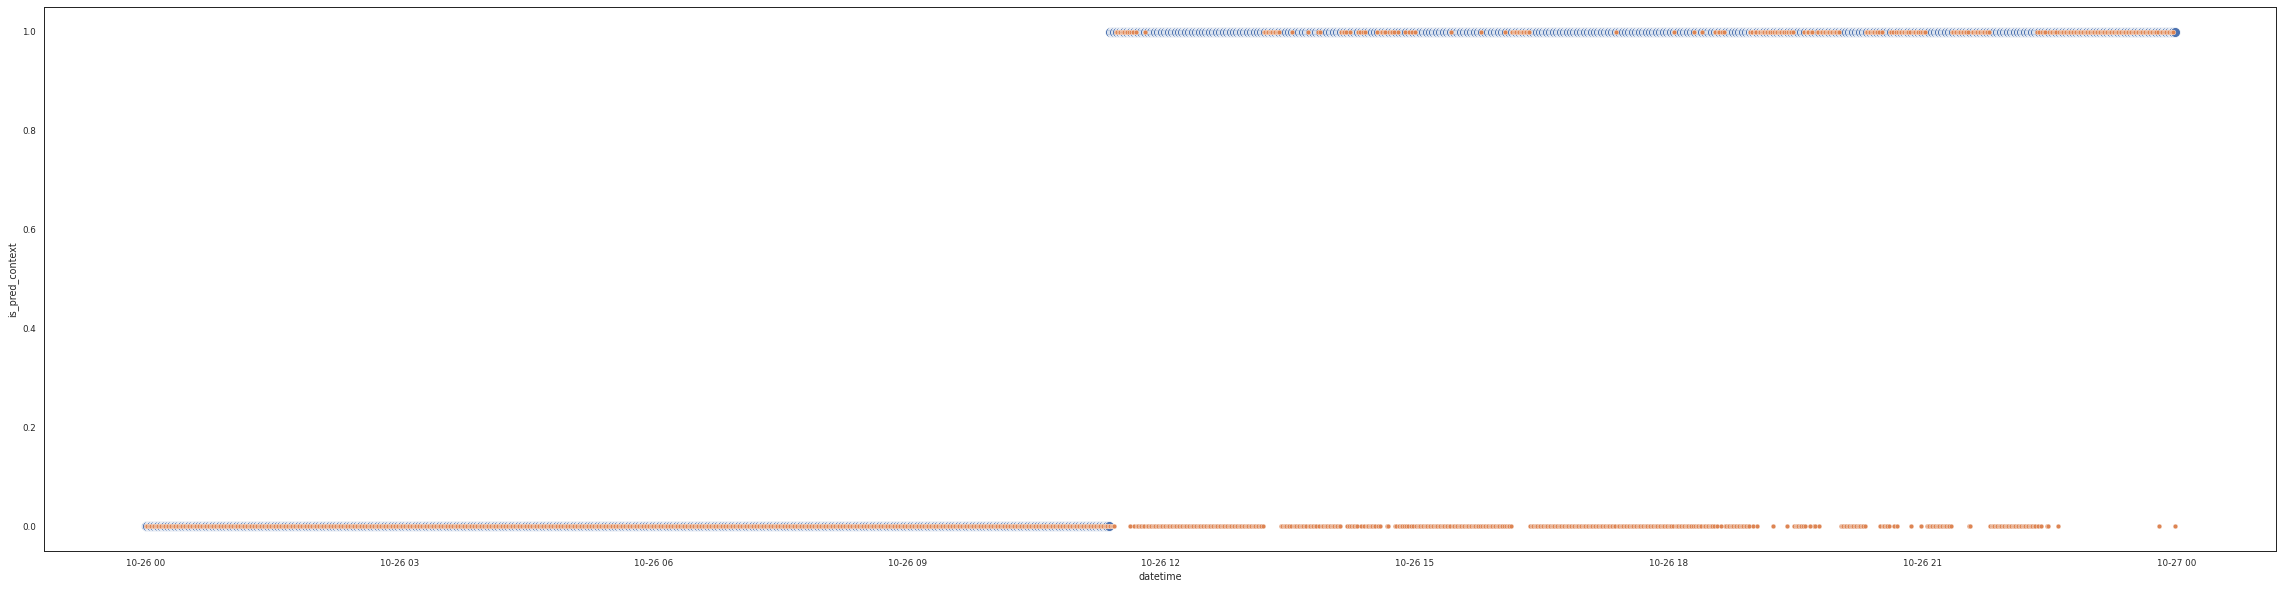

In [105]:
_,ax = plt.subplots(1,1,figsize=(40,10))
sns.scatterplot(data=df_ts, x='datetime',y='is_pred_context',ax=ax,s=100)
sns.scatterplot(data=df_ts, x='datetime',y='is_activities',ax=ax)


In [61]:
get_day_level_data('0BFC35E2-4817-4865-BFA7-764742302A2D','2015-10-22')['gt_context'].unique()

array(['', 'HouseWork', 'Commuting', 'Exercising', 'PreparingMeal'],
      dtype=object)

In [115]:
predicted_wellness_scores = {}
for user_id in df_gt['id'].unique():
    if user_id not in ts_results.keys():
        continue
    df_user_input = None
    user_days = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V_%Y-%m-%d").unique()
    user_weeks = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V").unique()
    print(user_id, user_days, user_weeks)
    
    user_week_context_attributes = []
    for week in user_weeks:
        week_context_attributes = {}
        for week_day in user_days:
            day_val = week_day.split("_")[1]
            df_day_wellness_input = get_day_level_data(user_id, day_val)
            df_day_wellness_input.columns =['timestamp','context_gt','context','activities','datetime']
            df_day_wellness_input['context_grp'] = (
                    df_day_wellness_input['context'] != df_day_wellness_input['context'].shift(1)).cumsum()
            day_contexts = df_day_wellness_input.groupby(['context_grp', 'context'], as_index=False).agg({
                'timestamp': ['min', 'max', lambda x: x.max() - x.min()]
            })
            day_contexts.columns = ['group', 'context', 'start', 'end', 'length']
            week_context_attributes[day_val] = day_contexts
        user_week_context_attributes.append([week, week_context_attributes])
        print(f'Done week {week}.')
    # break
    weekly_stress_scores = []
    for week, week_context_attributes in user_week_context_attributes:
        week_stress_score = get_daily_stress_score(week_context_attributes)
        weekly_stress_scores.append((week, week_stress_score))
        print(week, week_stress_score)
    predicted_wellness_scores[user_id] = weekly_stress_scores
    print(f"Donuser_iduser {user_id}")

00EABED2-271D-49D8-B599-1D4A09240601 ['2015-41_2015-10-07' '2015-41_2015-10-08' '2015-42_2015-10-12'
 '2015-41_2015-10-09' '2015-41_2015-10-06' '2015-41_2015-10-05'] ['2015-41' '2015-42']
Done week 2015-41.
Done week 2015-42.
2015-41 (3.5, {'2015-10-07': 0.3333333333333333, '2015-10-08': 0.3333333333333333, '2015-10-12': 0.33352941176470585, '2015-10-09': 0.2533333333333333, '2015-10-06': 0.3149019607843137, '2015-10-05': 0.5149019607843137})
2015-42 (3.5, {'2015-10-07': 0.3333333333333333, '2015-10-08': 0.3333333333333333, '2015-10-12': 0.33352941176470585, '2015-10-09': 0.2533333333333333, '2015-10-06': 0.3149019607843137, '2015-10-05': 0.5149019607843137})
Donuser_iduser 00EABED2-271D-49D8-B599-1D4A09240601
0A986513-7828-4D53-AA1F-E02D6DF9561B ['2015-50_2015-12-11' '2015-50_2015-12-10' '2015-50_2015-12-09'
 '2015-50_2015-12-08'] ['2015-50']
Done week 2015-50.
2015-50 (0.0, {'2015-12-11': 0.125, '2015-12-10': 0.0, '2015-12-09': 0.0, '2015-12-08': 0.0})
Donuser_iduser 0A986513-7828-4D

In [116]:
gt_wellness_scores = {}
for user_id in df_gt['id'].unique():
    if user_id not in ts_results.keys():
        continue
    df_user_input = None
    user_days = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V_%Y-%m-%d").unique()
    user_weeks = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V").unique()
    print(user_id, user_days, user_weeks)
    
    user_week_context_attributes = []
    for week in user_weeks:
        week_context_attributes = {}
        for week_day in user_days:
            day_val = week_day.split("_")[1]
            df_day_wellness_input = get_day_level_data(user_id, day_val)
            df_day_wellness_input.columns =['timestamp','context','context_pred','activities','datetime']
            df_day_wellness_input['context_grp'] = (
                    df_day_wellness_input['context'] != df_day_wellness_input['context'].shift(1)).cumsum()
            day_contexts = df_day_wellness_input.groupby(['context_grp', 'context'], as_index=False).agg({
                'timestamp': ['min', 'max', lambda x: x.max() - x.min()]
            })
            day_contexts.columns = ['group', 'context', 'start', 'end', 'length']
            week_context_attributes[day_val] = day_contexts
        user_week_context_attributes.append([week, week_context_attributes])
        print(f'Done week {week}.')
    # break
    weekly_stress_scores = []
    for week, week_context_attributes in user_week_context_attributes:
        week_stress_score = get_daily_stress_score(week_context_attributes)
        weekly_stress_scores.append((week, week_stress_score))
        print(week, week_stress_score)
    gt_wellness_scores[user_id] = weekly_stress_scores
    print(f"Donuser_iduser {user_id}")

00EABED2-271D-49D8-B599-1D4A09240601 ['2015-41_2015-10-07' '2015-41_2015-10-08' '2015-42_2015-10-12'
 '2015-41_2015-10-09' '2015-41_2015-10-06' '2015-41_2015-10-05'] ['2015-41' '2015-42']
Done week 2015-41.
Done week 2015-42.
2015-41 (2.0, {'2015-10-07': 0.16666666666666666, '2015-10-08': 0.16666666666666666, '2015-10-12': 0.16666666666666666, '2015-10-09': 0.08333333333333333, '2015-10-06': 0.16666666666666666, '2015-10-05': 0.3333333333333333})
2015-42 (2.0, {'2015-10-07': 0.16666666666666666, '2015-10-08': 0.16666666666666666, '2015-10-12': 0.16666666666666666, '2015-10-09': 0.08333333333333333, '2015-10-06': 0.16666666666666666, '2015-10-05': 0.3333333333333333})
Donuser_iduser 00EABED2-271D-49D8-B599-1D4A09240601
0A986513-7828-4D53-AA1F-E02D6DF9561B ['2015-50_2015-12-11' '2015-50_2015-12-10' '2015-50_2015-12-09'
 '2015-50_2015-12-08'] ['2015-50']
Done week 2015-50.
2015-50 (1.0, {'2015-12-11': 0.125, '2015-12-10': 0.125, '2015-12-09': 0.25, '2015-12-08': 0.25})
Donuser_iduser 0A98

In [ ]:
all_stress_contexts = ['Exercising','HouseWork','Commuting','Sleeping','OfficeWork']
# all_stress_activity_mapping = {
#     'Exercising':['Bicycling','Exercise','Running','Stairs - going down','Stairs - going up','Walking','Strolling'],
#     'HouseWork':['Cleaning','Doing laundry','Shopping','Washing dishes'],
#     'Commuting':['Bicycling','Running','Stairs - going down','Stairs - going up','Walking','Strolling'],
#     'Sleeping':['Sleeping'],
#     'OfficeWork':['Computer work','In a meeting','Lab work','In class','Surfing the internet','With co-workers'],
#     'Inactivity':['Lying down','Standing','Sitting'],
#     'Amusement':['With friends','WatchingTV'],

# }

all_stress_activity_mapping = {
    'Exercising':['Bicycling','Exercise','Running'],
    'HouseWork':['Cleaning','Doing laundry','Washing dishes'],
    'Commuting':['Stairs - going down','Stairs - going up','Walking','Strolling'],
    'Sleeping':['Sleeping'],
    'OfficeWork':['Computer work','In a meeting','Lab work','In class','Surfing the internet','With co-workers'],
    'Inactivity':['Lying down','Standing','Sitting'],
    'Amusement':['With friends','WatchingTV','Shopping'],

}

all_productivity_activity_mapping = {
    'OfficeWork':['Computer work','In a meeting','Lab work','In class','Surfing the internet','With co-workers','Sitting','Talking'],
    'Relaxing':['With friends','WatchingTV','Eating','Sitting','Lying down','Surfing the internet','With co-workers','Talking']
}

def get_context_from_productivity_activities(activity_str):
    if activity_str=='':
        return ''
    # print('===>',activity_str)
    context_str = []
    for context in all_productivity_activity_mapping:
        for activity in all_productivity_activity_mapping[context]:
            if activity in activity_str:
                # print(activity, context, '=>',context_str)
                context_str.append(context)
                # print(activity, context, '==>',context_str)
    context_str = ','.join(np.unique(context_str).tolist())
    # print('<==',context_str)
    return context_str


def get_context_from_activities(activity_str):
    if activity_str=='':
        return ''
    # print('===>',activity_str)
    context_str = []
    for context in all_stress_activity_mapping:
        for activity in all_stress_activity_mapping[context]:
            if activity in activity_str:
                # print(activity, context, '=>',context_str)
                context_str.append(context)
                # print(activity, context, '==>',context_str)
    context_str = ','.join(np.unique(context_str).tolist())
    # print('<==',context_str)
    return context_str
all_activities = ['Bathing - shower',
 'Bicycling',
 'Cleaning',
 'Computer work',
 'Cooking',
 'Doing laundry',
 'Dressing',
 'Drinking (alcohol)',
 "Drive - I'm a passenger",
 "Drive - I'm the driver",
 'Eating',
 'Exercise',
 'Grooming',
 'In a meeting',
 'In class',
 'Lab work',
 'Lying down',
 'Running',
 'Shopping',
 'Singing',
 'Sitting',
 'Sleeping',
 'Stairs - going down',
 'Stairs - going up',
 'Standing',
 'Strolling',
 'Surfing the internet',
 'Talking',
 'Toilet',
 'Walking',
 'Washing dishes',
 'WatchingTV',
 'With co-workers',
 'With friends']

In [ ]:
def get_office_work_fraction(x, verbose=False):
    is_office_work_present = [('OfficeWork' in xr) for xr in x]
    return sum(is_office_work_present)/len(is_office_work_present)

def get_relaxing_fraction(x, verbose=False):
    is_relaxing_present = [(('Relaxing' in xr)  | ('Amusement' in xr) | ('HavingMeal' in xr) | ('UsingBathroom' in xr)) for xr in x]
    return sum(is_relaxing_present)/len(is_relaxing_present)


In [175]:
def get_day_level_productivity_data(user_id, day_val):
    prod_id_input = get_day_level_data(user_id, day_val)
    prod_id_input.columns =['timestamp','context_gt','context_pred','activities','datetime']
    prod_id_input.columns =['timestamp','context_gt','context_pred','activities','datetime']
    prod_id_input['context_activity'] =prod_id_input['activities'].apply(lambda x: get_context_from_productivity_activities(x))
    
    prod_id_input['week'] = prod_id_input['datetime'].apply(lambda x: x.strftime("%Y_%V"))
    prod_id_input['day'] = prod_id_input['datetime'].apply(lambda x: x.strftime("%Y-%m-%d"))
    prod_id_input['hourOfDay'] = prod_id_input['datetime'].apply(lambda x: x.strftime("%H"))
    # print(prod_id_input.columns)
    prod_id_input = prod_id_input[['day','hourOfDay','context_pred','context_gt','context_activity']]
    # print(prod_id_input['context_activity'].unique())
    prod_id_input = prod_id_input.groupby(['day','hourOfDay'],as_index=False).agg({
        'context_pred':[lambda x: get_office_work_fraction(x), 
                        lambda x: get_relaxing_fraction(x)],
        'context_gt':[lambda x: get_office_work_fraction(x), 
                        lambda x: get_relaxing_fraction(x)],
        'context_activity':[lambda x: get_office_work_fraction(x), 
                        lambda x: get_relaxing_fraction(x)]
    
    })
    prod_id_input.columns = ['day','hourOfDay','OfficeWork_pred','Relaxing_pred','OfficeWork_gt','Relaxing_gt','OfficeWork_activity','Relaxing_activity']
    prod_id_input['id'] = user_id
    prod_id_input = prod_id_input[['id','day','hourOfDay','OfficeWork_pred','Relaxing_pred','OfficeWork_gt','Relaxing_gt','OfficeWork_activity','Relaxing_activity']]
    return prod_id_input


In [ ]:
selected_users = {'7D9BB102-A612-4E2A-8E22-3159752F55D8':[],
 '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842':[],
 '1538C99F-BA1E-4EFB-A949-6C7C47701B20':[],
'7CE37510-56D0-4120-A1CF-0E23351428D2':[],
'1155FF54-63D3-4AB2-9863-8385D0BD0A13':[],
'0BFC35E2-4817-4865-BFA7-764742302A2D':['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25', '2015-10-26', '2015-10-27']}

df_all = None
for user in selected_users:
    prod_input = get_day_level_productivity_data(user_id, -1)

    1440
Name: pred_context, dtype: int64
    1440
Name: pred_context, dtype: int64
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['']
    1440
Name: pred_context, dtype: int64
    1440
Name: pred_context, dtype: int64
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['']
    1440
Name: pred_context, dtype: int64
    1440
Name: pred_context, dtype: int64
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['']
    1440
Name: pred_context, dtype: int64
    1440
Name: pred_context, dtype: int64
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['']
    1440
Name: pred_context,

In [168]:
df_prod_earlier = pd.read_csv('input_to_calculate_productivity_per_user_over_days.csv')
df_prod_earlier[['id','day']].rename(columns={'day':'date'}).drop_duplicates().to_dict(orient='records')

[{'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-20'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-21'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-22'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-23'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-24'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-25'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-26'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-24'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-25'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-26'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-28'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-29'},
 {'id'

In [176]:
selected_user_dates = [{'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-20'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-21'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-22'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-23'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-24'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-25'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-26'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-24'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-25'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-26'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-28'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-29'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-30'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-31'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-06-01'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-06-02'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-20'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-21'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-22'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-23'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-24'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-25'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-26'},
 {'id': '1538C99F-BA1E-4EFB-A949-6C7C47701B20', 'date': '2015-10-27'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-26'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-27'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-28'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-29'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-30'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-08-31'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-09-01'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-09-02'},
 {'id': '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', 'date': '2015-09-03'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-07'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-08'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-09'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-10'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-11'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-12'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-13'},
 {'id': '7CE37510-56D0-4120-A1CF-0E23351428D2', 'date': '2015-10-14'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-16'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-17'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-18'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-19'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-20'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-21'},
 {'id': '7D9BB102-A612-4E2A-8E22-3159752F55D8', 'date': '2015-11-22'}]

days_gt_pred_act = pd.DataFrame()
for user_date in selected_user_dates:
    print(user_date['id'], user_date['date'])
    df = get_day_level_productivity_data(user_date['id'],user_date['date'])
    days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)

0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-20


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-21


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-22


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-23
0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-24


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-25
0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-26


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


0BFC35E2-4817-4865-BFA7-764742302A2D 2015-10-27
1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-24


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-25


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-26
1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-27


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-28


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-29
1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-30


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-05-31
1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-06-01


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1155FF54-63D3-4AB2-9863-8385D0BD0A13 2016-06-02
1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-20


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-21


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-22


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-23


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-24


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-25


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-26


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1538C99F-BA1E-4EFB-A949-6C7C47701B20 2015-10-27


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-26


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-27


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-28


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-29


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-30


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-08-31


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-09-01


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-09-02


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842 2015-09-03
7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-07


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-08


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-09


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-10


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-11


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-12


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-13


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7CE37510-56D0-4120-A1CF-0E23351428D2 2015-10-14


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-16
7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-17


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-18
7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-19
7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-20
7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-21
7D9BB102-A612-4E2A-8E22-3159752F55D8 2015-11-22


/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/1403936828.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


In [178]:
days_gt_pred_act.to_csv("may_15_input_productivity_all_users.csv")

In [170]:
days_gt_pred_act = pd.DataFrame()
days_for_user = ['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25', '2015-10-26', '2015-10-27']
user = '0BFC35E2-4817-4865-BFA7-764742302A2D'

In [123]:
get_day_level_productivity_data(user, '2015-10-20')

Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']


,id,day,hourOfDay,OfficeWork_pred,Relaxing_pred,OfficeWork_gt,Relaxing_gt,OfficeWork_activity,Relaxing_activity
0,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [124]:
for day in days_for_user: 
    print(day)
    df = get_day_level_productivity_data(user, day)
    days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)

2015-10-20
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-21


/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-22
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']


/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


2015-10-23
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-24


/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-25
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-26


/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']
2015-10-27
Index(['timestamp', 'context_gt', 'context_pred', 'activities', 'datetime',
       'context_activity', 'week', 'day', 'hourOfDay'],
      dtype='object')
['' 'OfficeWork,Relaxing']


/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)
/tmp/ipykernel_31185/3519362089.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  days_gt_pred_act = days_gt_pred_act.append(df, ignore_index=True)


In [125]:
days_gt_pred_act

,id,day,hourOfDay,OfficeWork_pred,Relaxing_pred,OfficeWork_gt,Relaxing_gt,OfficeWork_activity,Relaxing_activity
0,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,00,0.0,0.0,0.0,0.0,0.0,0.0
1,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,01,0.0,0.0,0.0,0.0,0.0,0.0
2,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,02,0.0,0.0,0.0,0.0,0.0,0.0
3,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,03,0.0,0.0,0.0,0.0,0.0,0.0
4,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-20,04,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
187,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-27,19,0.0,0.0,0.0,0.0,0.0,0.0
188,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-27,20,0.0,0.0,0.0,0.0,0.0,0.0
189,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-27,21,0.0,0.0,0.0,0.0,0.0,0.0
190,0BFC35E2-4817-4865-BFA7-764742302A2D,2015-10-27,22,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
days_gt_pred_act.to_csv("may_13_input_to_calculate_productivity_per_user_over_days.csv", index=False)

In [127]:
activities_wellness_scores = {}
for user_id in df_gt['id'].unique():
    if user_id not in ts_results.keys():
        continue
    df_user_input = None
    user_days = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V_%Y-%m-%d").unique()
    user_weeks = pd.to_datetime(df_gt[df_gt['id']==user_id]['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None).dt.strftime("%Y-%V").unique()
    print(user_id, user_days, user_weeks)
    
    user_week_context_attributes = []
    for week in user_weeks:
        week_context_attributes = {}
        for week_day in user_days:
            day_val = week_day.split("_")[1]
            df_day_wellness_input = get_day_level_data(user_id, day_val)
            df_day_wellness_input.columns =['timestamp','context_gt','context_pred','activities','datetime']
            df_day_wellness_input['context'] =df_day_wellness_input['activities'].apply(lambda x: get_context_from_activities(x))
            df_day_wellness_input['context_grp'] = (
                    df_day_wellness_input['context'] != df_day_wellness_input['context'].shift(1)).cumsum()
            day_contexts = df_day_wellness_input.groupby(['context_grp', 'context'], as_index=False).agg({
                'timestamp': ['min', 'max', lambda x: x.max() - x.min()]
            })
            day_contexts.columns = ['group', 'context', 'start', 'end', 'length']
            week_context_attributes[day_val] = day_contexts
            # break
        
        user_week_context_attributes.append([week, week_context_attributes])
        print(f'Done week {week}.')
    # break
    weekly_stress_scores = []
    for week, week_context_attributes in user_week_context_attributes:
        week_stress_score = get_daily_stress_score(week_context_attributes)
        weekly_stress_scores.append((week, week_stress_score))
        print(week, week_stress_score)
    activities_wellness_scores[user_id] = weekly_stress_scores
    print(f"Donuser_iduser {user_id}")

00EABED2-271D-49D8-B599-1D4A09240601 ['2015-41_2015-10-07' '2015-41_2015-10-08' '2015-42_2015-10-12'
 '2015-41_2015-10-09' '2015-41_2015-10-06' '2015-41_2015-10-05'] ['2015-41' '2015-42']
Done week 2015-41.
Done week 2015-42.
2015-41 (2.0, {'2015-10-07': 0.16666666666666666, '2015-10-08': 0.16666666666666666, '2015-10-12': 0.16666666666666666, '2015-10-09': 0.16666666666666666, '2015-10-06': 0.16666666666666666, '2015-10-05': 0.3333333333333333})
2015-42 (2.0, {'2015-10-07': 0.16666666666666666, '2015-10-08': 0.16666666666666666, '2015-10-12': 0.16666666666666666, '2015-10-09': 0.16666666666666666, '2015-10-06': 0.16666666666666666, '2015-10-05': 0.3333333333333333})
Donuser_iduser 00EABED2-271D-49D8-B599-1D4A09240601
0A986513-7828-4D53-AA1F-E02D6DF9561B ['2015-50_2015-12-11' '2015-50_2015-12-10' '2015-50_2015-12-09'
 '2015-50_2015-12-08'] ['2015-50']
Done week 2015-50.
2015-50 (2.0, {'2015-12-11': 0.25, '2015-12-10': 0.25, '2015-12-09': 0.25, '2015-12-08': 0.5})
Donuser_iduser 0A98651

In [128]:
gt_wellness_scores.keys()

dict_keys(['00EABED2-271D-49D8-B599-1D4A09240601', '0A986513-7828-4D53-AA1F-E02D6DF9561B', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0BFC35E2-4817-4865-BFA7-764742302A2D'])

In [129]:
predicted_wellness_scores.keys()

dict_keys(['00EABED2-271D-49D8-B599-1D4A09240601', '0A986513-7828-4D53-AA1F-E02D6DF9561B', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0BFC35E2-4817-4865-BFA7-764742302A2D'])

In [130]:
activities_wellness_scores.keys()

dict_keys(['00EABED2-271D-49D8-B599-1D4A09240601', '0A986513-7828-4D53-AA1F-E02D6DF9561B', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0BFC35E2-4817-4865-BFA7-764742302A2D'])

In [131]:
import pickle
pickle.dump({'groundtruth':gt_wellness_scores,'predicted':predicted_wellness_scores,
             'activities':activities_wellness_scores},open('/home/prasoon/context_sensing/cache/feb2023/stress_scores_may13.pb','wb'))

In [132]:
df_day_wellness_input[~(df_day_wellness_input.context=='')]

,timestamp,context_gt,context_pred,activities,datetime,context,context_grp
703,1.445367e+09,,Amusement,"Sitting,In a meeting,Talking",2015-10-20 11:43:00,"Inactivity,OfficeWork",2
704,1.445367e+09,InAMeeting,Amusement,"Sitting,In a meeting,Talking",2015-10-20 11:44:00,"Inactivity,OfficeWork",2
705,1.445367e+09,InAMeeting,Amusement,"Sitting,In a meeting,Talking",2015-10-20 11:45:00,"Inactivity,OfficeWork",2
706,1.445367e+09,InAMeeting,Amusement,"Sitting,In a meeting,Talking",2015-10-20 11:46:00,"Inactivity,OfficeWork",2
707,1.445367e+09,InAMeeting,Amusement,"Sitting,In a meeting,Talking",2015-10-20 11:47:00,"Inactivity,OfficeWork",2
...,...,...,...,...,...,...,...
1310,1.445400e+09,"Commuting,Amusement",Amusement,"Sitting,Drive - I'm the driver,Talking,With fr...",2015-10-20 20:53:00,"Amusement,Inactivity",224
1311,1.445400e+09,"Commuting,Amusement",Amusement,"Sitting,Drive - I'm the driver,Talking,With fr...",2015-10-20 20:53:00,"Amusement,Inactivity",224
1314,1.445400e+09,"Commuting,Amusement",Amusement,"Sitting,Drive - I'm the driver,Talking,With fr...",2015-10-20 20:56:00,"Amusement,Inactivity",226
1315,1.445400e+09,"Commuting,Amusement",Amusement,"Sitting,Drive - I'm the driver,Talking,With fr...",2015-10-20 20:57:00,"Amusement,Inactivity",226


In [40]:
sample_week_id, week_context_attributes = user_week_context_attributes[0]
sample_week_id

'2015-41'

In [50]:
stress_score = 0.
stress_score_days = {day:0. for day in week_context_attributes}
total_days_data_in_week = len(week_context_attributes.keys())
total_days_data_in_week, stress_score_days

(6,
 {'2015-10-07': 0.0,
  '2015-10-08': 0.0,
  '2015-10-12': 0.0,
  '2015-10-09': 0.0,
  '2015-10-06': 0.0,
  '2015-10-05': 0.0})

In [63]:
def get_daily_stress_score(week_context_attributes):
    """
    Return stress score for the week, and bifurcation across days
    :param week_context_attributes: How days context looks like
    :return: weekly stress score based on FSM
    """
    stress_score = 0.
    stress_score_days = {day:0. for day in week_context_attributes}
    total_days_data_in_week = len(week_context_attributes.keys())
    # Condition 1: Context of exercising and housework existing in 57% of week: -1 stress score
    c1_exercise_count, c1_housework_count = 0.,0.
    c1_eday, c1_hday = [],[]
    for day in week_context_attributes.keys():
        if 'Exercising' in week_context_attributes[day].context.values:
            c1_exercise_count +=1
            c1_eday.append(day)
        if 'HouseWork' in week_context_attributes[day].context.values:
            c1_housework_count+=1
            c1_hday.append(day)

    if ((c1_exercise_count/total_days_data_in_week) >= 0.57) and ((c1_housework_count/total_days_data_in_week) >= 0.57):
        stress_score -= 1
        for day in c1_eday:
            stress_score_days[day]-=(0.5)/total_days_data_in_week
        for day in c1_hday:
            stress_score_days[day]-=(0.5)/total_days_data_in_week
    stress_score_days    

    c2a_exercise_count = c1_exercise_count
    c2b_housework_count = c1_housework_count

    if (c2a_exercise_count/total_days_data_in_week) < 0.57:
        for day in stress_score_days:
            if 'Exercising' not in week_context_attributes[day].context.values:
                stress_score_days[day] += (0.5/total_days_data_in_week)
        stress_score += 0.5
    if (c2b_housework_count/total_days_data_in_week) < 0.57:
        for day in stress_score_days:
            if 'HouseWork' not in week_context_attributes[day].context.values:
                stress_score_days[day] += (0.5/total_days_data_in_week)
        stress_score += 0.5

    stress_score_days

    # Condition 3: context of commute for more than an hour(on average) in a day everyday: +0.5 stress score
    c3_commute_hours = []
    c3_commute_hours_days = {day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'Commuting' not in week_context_attributes[day].context.values:
            c3_commute_hours.append(0.)
        else:
            day_commute_values = week_context_attributes[day][week_context_attributes[day].context=='Commuting']
            day_commute_values['period'] = day_commute_values['end'] - day_commute_values['start']
            c3_commute_hours_days[day]=day_commute_values['period'].sum()
            c3_commute_hours.append(day_commute_values['period'].sum())

    if np.mean(c3_commute_hours) > (60*60): # more than 1 hours of average commute
        stress_score +=0.5
        total_commute_hours = np.sum(c3_commute_hours)
        for day in stress_score_days:
            stress_score_days[day] +=  (0.5/total_days_data_in_week)*(c3_commute_hours_days[day]/total_commute_hours)                                              

    stress_score_days                                                      

    # condition 4a: context of sleep for less than 6 hours on more than 3 days(42% week): +1 stress score
    # condition 4b: context of sleep for less more than 8 hours on an average: -0.5 stress score
    c4_sleep_hours = []
    c4_sleep_hours_days = {day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'Sleeping' not in week_context_attributes[day].context.values:
            c4_sleep_hours.append(0.)
        else:
            day_sleep_values = week_context_attributes[day][week_context_attributes[day].context == 'Sleeping']
            day_sleep_values['period'] = day_sleep_values['end'] - day_sleep_values['start']
            c4_sleep_hours_days[day] = day_sleep_values['period'].sum()
            c4_sleep_hours.append(day_sleep_values['period'].sum())

    if np.max(sorted(c4_sleep_hours)[:3]) < (6 * 60 * 60):  # 4a.less than 6 hours of sleep for 3 days
        stress_score += 1
        if c4_sleep_hours_days[day]<(6 * 60 * 60):
            stress_score_days[day]+=(1/total_days_data_in_week)

    if np.mean(c4_sleep_hours) > (8 * 60 * 60):  # 4b. more than 8 hours of sleep
        stress_score -= 0.5
        if c4_sleep_hours_days[day]>(6 * 60 * 60):
            stress_score_days[day]-=(0.5/total_days_data_in_week)
    stress_score_days




    # condition 5: (More than 4 days(57%) of Exercising context for more than half an hour) &
    # (Different working hours (>40% difference) across days): +0.5 stress score
    c5_exercising_count = c1_exercise_count
    c5_exercising_hours = []
    c5_exercising_day_hours = {day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'Exercising' in week_context_attributes[day].context.values:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'Exercising']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            c5_exercising_hours.append(day_exercise_values['period'].sum())
            c5_exercising_day_hours[day]=day_exercise_values['period'].sum()

    c5_exercise_cond = False
    if ((c5_exercising_count/total_days_data_in_week) >= 0.57) and (np.min(c5_exercising_hours) > (0.5*60*60)):
        c5_exercise_cond = True


    c5_working_periods = {}
    for day in week_context_attributes:
        if 'OfficeWork' in week_context_attributes[day].context.values:
            day_work_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_work_values['start_hour'] = pd.to_datetime(day_work_values['start'],unit='s').dt.hour
            day_work_values['end_hour'] = pd.to_datetime(day_work_values['end'], unit='s').dt.hour
            c5_working_periods[day] = np.zeros(24)
            for idx, row in day_work_values.iterrows():
                c5_working_periods[day][row['start_hour']:row['end_hour']+1] = 1


    c5_hour_differences= [0.]
    c5_hour_differences_day = {day:[0.] for day in stress_score_days}
    for dayA in c5_working_periods.keys():
        dayA_differences=[]
        for dayB in c5_working_periods.keys():
            if not (dayA==dayB):
                working_hoursA = c5_working_periods[dayA]
                working_hoursB = c5_working_periods[dayB]
                diff_hours = np.sum(working_hoursA!=working_hoursB)
                same_hours = np.sum(np.logical_and(working_hoursA==working_hoursB,working_hoursA))
                if same_hours > 0.:
                    c5_hour_differences.append(diff_hours / same_hours)
                    dayA_differences.append(diff_hours / same_hours)
                else:
                    c5_hour_differences.append(0.)
        c5_hour_differences_day[dayA]+=dayA_differences

    c5_working_cond = False
    if np.max(c5_hour_differences) > 0.4:
        c5_working_cond = True
        min_hour_start = min([c5_working_periods[day_x].argmin() for day_x in c5_working_periods])
        min_hour_end = min([c5_working_periods[day_x].argmin() for day_x in c5_working_periods])

    if (c5_working_cond) & (c5_exercise_cond):
        stress_score +=0.5
        for day in stress_score_days:
            if c5_exercising_day_hours[day]<c5_exercising_hours:
                    stress_score_days[day]+=(0.5/total_days_data_in_week)

        for day in stress_score_days:
            if c5_exercising_day_hours[day]<c5_exercising_hours:
                    stress_score_days[day]+=(0.25/total_days_data_in_week)
            stress_score_days[day]+=(0.25/total_days_data_in_week)*(c5_hour_differences_day[day].max()/np.max(c5_hour_differences))

    stress_score_days

    # condition 6: (No context of exercising) & (Different working hours across days): +1 stress score
    c6_exercise_count=  c1_exercise_count
    c6_working_hour_diff = c5_hour_differences
    if (c6_exercise_count==0.) & (np.mean(c5_hour_differences) > 0.4):
        stress_score += 1
        for day in stress_score_days:
            stress_score_days[day]+=1/total_days_data_in_week
    stress_score_days

    # condition 7: (More than 4 days of Exercising context for more than half an hour) &
    # (No Different working hours (>40% difference)  across days): -1 stress score
    c7_exercise_cond = c5_exercise_cond
    c7_hour_differences = c5_hour_differences

    if (c7_exercise_cond) & (np.max(c7_hour_differences) < 0.4):
        stress_score -= 1.
        for day in stress_score_days:
            stress_score_days[day]-=1/total_days_data_in_week

    # condition 8: (More than 10 hrs of works in any day) OR (50+ hours per week): +1 stress score
    c8_work_hours = []
    c8_work_hours_day= {day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'OfficeWork' in week_context_attributes[day].context.values:
            day_work_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_work_values['period'] = day_work_values['end'] - day_work_values['start']
            c8_work_hours.append(day_work_values['period'].sum())
            c8_work_hours_day[day]=day_work_values['period'].sum()
        else:
            c8_work_hours.append(0.)

    if (np.max(c8_work_hours) > (10 * 60 * 60)) or (np.sum(c8_work_hours) > (50 * 60 * 60)):
        stress_score += 1
        for day in stress_score_days:
            if c8_work_hours_day[day]>10*60*60:
                stress_score_days[day]+=1/total_days_data_in_week

    stress_score_days

    # condition 10a: More than 15 mins exercising every day: -0.5 stress score
    # condition 10b: More than 1 hour housework every day: -0.5 stress score
    c10a_exercising_hours = []
    c10a_exercising_hours_day={day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'Exercising' in week_context_attributes[day].context.values:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'Exercising']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            c10a_exercising_hours.append(day_exercise_values['period'].sum())
            c10a_exercising_hours_day[day]=day_exercise_values['period'].sum()
        else:
            c10a_exercising_hours.append(0.)

    c10b_housework_hours = []
    c10b_housework_hours_day  ={day:0. for day in stress_score_days}
    for day in week_context_attributes:
        if 'HouseWork' not in week_context_attributes[day].context.values:
            c10b_housework_hours.append(0.)
        else:
            day_housework = week_context_attributes[day][week_context_attributes[day].context == 'HouseWork']
            day_housework['period'] = day_housework['end'] - day_housework['start']
            c10b_housework_hours.append(day_housework['period'].sum())
            c10b_housework_hours_day[day]=day_housework['period'].sum()

    if np.min(c10a_exercising_hours) > 15 * 60:
        stress_score -=0.5
        for day in stress_score_days:
            stress_score_days[day]-=(0.5/total_days_data_in_week)


    if np.min(c10b_housework_hours) > 60 * 60:
        stress_score -= 0.5
        for day in stress_score_days:
            stress_score_days[day]-=(0.5/total_days_data_in_week)
    stress_score_days


    # condition 11a: Continuous 30 mins exercise, five times a week: -1 stress score
    # condition 11b: 15 mins exercise twice, five times a week: -1 stress score
    # condition 11c: 10 mins exercise thrice, five times a week: -1 stress score

    c11_day_cond = {day:False for day in stress_score_days}
    for day in week_context_attributes.keys():
        if 'Exercising' not in week_context_attributes[day].context.values:
            continue
        else:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            day_num_exercises = day_exercise_values.shape[0]
            day_min_continuous_exercise = day_exercise_values['period'].min()
            if (day_num_exercises >=1) and (day_min_continuous_exercise > 30*60):
                c11_day_cond[day]=True
            elif (day_num_exercises >=2) and (day_min_continuous_exercise > 15*60):
                c11_day_cond[day]=True
            elif (day_num_exercises >=3) and (day_min_continuous_exercise > 10*60):
                c11_day_cond[day]=True
            else:
                c11_day_cond[day]=False

    if (sum(c11_day_cond.values())/len(c11_day_cond)) > 0.7: # 5+ days in a week
        stress_score -= 1
        for day in stress_score_days:
            if c11_day_cond[day]:
                stress_score_days[day]-=1/total_days_data_in_week

    # condition 12: Working hours more than 8 for more than 5 days: +1 stress score
    c12_work_hours = c8_work_hours

    if np.percentile(c12_work_hours,0.7) > (8 * 60 * 60):
        stress_score += 1
        for day in stress_score_days:
            if c8_work_hours_day[day]>8*60*60:
                stress_score_days[day]+=1/total_days_data_in_week
    stress_score_days

    # condition 13a: Inactivity/Amusement for more than 2 hours everyday: -0.5 stress score
    # condition 13b: Inactivity/Amusement/Housework for more than 5 hours atleast two days: -0.5 stress score
    c13a_inactivity_amusement_hours = []
    c13a_inactivity_amusement_hours_day={day:0. for day in stress_score_days}
    for day in week_context_attributes:
        day_13a_hours = week_context_attributes[day][week_context_attributes[day].context.isin(['Inactivity','Amusement'])]
        if day_13a_hours.shape[0] > 0.:
            c13a_inactivity_amusement_hours.append((day_13a_hours['end'] - day_13a_hours['start']).sum())
            c13a_inactivity_amusement_hours_day[day]=(day_13a_hours['end'] - day_13a_hours['start']).sum()
        else:
            c13a_inactivity_amusement_hours.append(0.)

    c13b_inactivity_amusement_housework_hours = []
    c13b_inactivity_amusement_housework_hours_day = {day:0. for day in stress_score_days}
    for day in week_context_attributes:
        day_13b_hours = week_context_attributes[day][week_context_attributes[day].context.isin(['Inactivity','Amusement','HouseWork'])]
        if day_13b_hours.shape[0] > 0.:
            c13b_inactivity_amusement_housework_hours.append((day_13b_hours['end'] - day_13b_hours['start']).sum())
            c13b_inactivity_amusement_housework_hours_day[day] = (day_13b_hours['end'] - day_13b_hours['start']).sum()
        else:
            c13b_inactivity_amusement_housework_hours.append(0.)

    if np.min(c13a_inactivity_amusement_hours) > (2 * 60 * 60):
        stress_score -= 0.5
        for day in stress_score_days:
            stress_score_days[day]-=0.5/total_days_data_in_week 
    if np.percentile(c13b_inactivity_amusement_housework_hours, 30) > (5 * 60 * 60):
        stress_score -= 0.5
        for day in stress_score_days:
            if c13b_inactivity_amusement_housework_hours_day[day]> (5 * 60 * 60):
                stress_score_days[day]-=0.5/total_days_data_in_week 
    stress_score_days


    c14_working_periods = c5_working_periods
    c14_night_work = []
    c14_night_work_days = {day:False for day in stress_score_days}
    for day in c14_working_periods.keys():
        if np.sum(c14_working_periods[day][:8]) > 1:
            c14_night_work.append(True)
            c14_night_work_days[day]=True
        else:
            c14_night_work.append(False)

    if np.sum(c14_night_work) >=1:
        stress_score +=1
        for day in stress_score_days:
            if c14_night_work_days[day]:
                stress_score_days[day]+=1./total_days_data_in_week 
    if np.sum(c14_night_work) >=4:
        stress_score += 1
        for day in stress_score_days:
            if c14_night_work_days[day]:
                stress_score_days[day]+=1./total_days_data_in_week 
    stress_score_days
    return stress_score, stress_score_days

In [68]:
def get_weekly_stress_score(week_context_attributes):
    """
    Return stress score for the week
    :param week_context_attributes: How days context looks like
    :return: weekly stress score based on FSM
    """
    stress_score = 0.
    total_days_data_in_week = len(week_context_attributes.keys())

    # Condition 1: Context of exercising and housework existing in 57% of week: -1 stress score
    c1_exercise_count, c1_housework_count = 0.,0.
    for day in week_context_attributes.keys():
        if 'Exercising' in week_context_attributes[day].context.values:
            c1_exercise_count +=1
        if 'HouseWork' in week_context_attributes[day].context.values:
            c1_housework_count+=1

    if ((c1_exercise_count/total_days_data_in_week) >= 0.57) and ((c1_housework_count/total_days_data_in_week) >= 0.57):
        stress_score -= 1

    # Condition 2a: No context of exercising for more than 57% week(4 days if full week available): +0.5 stress score
    # Condition 2b: No context of housework  for more than 4 days(57% week): +0.5 stress score
    c2a_exercise_count = c1_exercise_count
    c2b_housework_count = c1_housework_count

    if (c2a_exercise_count/total_days_data_in_week) < 0.57:
        stress_score += 0.5
    if (c2b_housework_count/total_days_data_in_week) < 0.57:
        stress_score += 0.5

    # Condition 3: context of commute for more than an hour(on average) in a day everyday: +0.5 stress score
    c3_commute_hours = []
    for day in week_context_attributes:
        if 'Commuting' not in week_context_attributes[day].context.values:
            c3_commute_hours.append(0.)
        else:
            day_commute_values = week_context_attributes[day][week_context_attributes[day].context=='Commuting']
            day_commute_values['period'] = day_commute_values['end'] - day_commute_values['start']
            c3_commute_hours.append(day_commute_values['period'].sum())

    if np.mean(c3_commute_hours) > (60*60): # more than 1 hours of average commute
        stress_score +=0.5


    # condition 4a: context of sleep for less than 6 hours on more than 3 days(42% week): +1 stress score
    # condition 4b: context of sleep for less more than 8 hours on an average: -0.5 stress score
    c4_sleep_hours = []
    for day in week_context_attributes:
        if 'Sleeping' not in week_context_attributes[day].context.values:
            c4_sleep_hours.append(0.)
        else:
            day_sleep_values = week_context_attributes[day][week_context_attributes[day].context == 'Sleeping']
            day_sleep_values['period'] = day_sleep_values['end'] - day_sleep_values['start']
            c4_sleep_hours.append(day_sleep_values['period'].sum())

    if np.max(sorted(c4_sleep_hours)[:3]) < (6 * 60 * 60):  # 4a.less than 6 hours of sleep for 3 days
        stress_score += 1

    if np.mean(c4_sleep_hours) > (8 * 60 * 60):  # 4b. more than 8 hours of sleep
        stress_score -= 0.5

    # condition 5: (More than 4 days(57%) of Exercising context for more than half an hour) &
    # (Different working hours (>40% difference) across days): +0.5 stress score
    c5_exercising_count = c1_exercise_count
    c5_exercising_hours = []
    for day in week_context_attributes:
        if 'Exercising' in week_context_attributes[day].context.values:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'Exercising']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            c5_exercising_hours.append(day_exercise_values['period'].sum())
    c5_exercise_cond = False
    if ((c5_exercising_count/total_days_data_in_week) >= 0.57) and (np.min(c5_exercising_hours) > (0.5*60*60)):
        c5_exercise_cond = True

    c5_working_periods = {}
    for day in week_context_attributes:
        if 'OfficeWork' in week_context_attributes[day].context.values:
            day_work_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_work_values['start_hour'] = pd.to_datetime(day_work_values['start'],unit='s').dt.hour
            day_work_values['end_hour'] = pd.to_datetime(day_work_values['end'], unit='s').dt.hour
            c5_working_periods[day] = np.zeros(24)
            for idx, row in day_work_values.iterrows():
                c5_working_periods[day][row['start_hour']:row['end_hour']+1] = 1

    c5_hour_differences= [0.]
    for dayA in c5_working_periods.keys():
        for dayB in c5_working_periods.keys():
            if not (dayA==dayB):
                working_hoursA = c5_working_periods[dayA]
                working_hoursB = c5_working_periods[dayB]
                diff_hours = np.sum(working_hoursA!=working_hoursB)
                same_hours = np.sum(np.logical_and(working_hoursA==working_hoursB,working_hoursA))
                if same_hours > 0.:
                    c5_hour_differences.append(diff_hours / same_hours)
                else:
                    c5_hour_differences.append(0.)

    c5_working_cond = False
    if np.max(c5_hour_differences) > 0.4:
        c5_working_cond = True

    if (c5_working_cond) & (c5_exercise_cond):
        stress_score +=0.5

    # condition 6: (No context of exercising) & (Different working hours across days): +1 stress score
    c6_exercise_count=  c1_exercise_count
    c6_working_hour_diff = c5_hour_differences
    if (c6_exercise_count==0.) & (np.mean(c5_hour_differences) > 0.4):
        stress_score += 1

    # condition 7: (More than 4 days of Exercising context for more than half an hour) &
    # (No Different working hours (>40% difference)  across days): -1 stress score
    c7_exercise_cond = c5_exercise_cond
    c7_hour_differences = c5_hour_differences

    if (c7_exercise_cond) & (np.max(c7_hour_differences) < 0.4):
        stress_score -= 1.

    # condition 8: (More than 10 hrs of works in any day) OR (50+ hours per week): +1 stress score
    c8_work_hours = []
    for day in week_context_attributes:
        if 'OfficeWork' in week_context_attributes[day].context.values:
            day_work_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_work_values['period'] = day_work_values['end'] - day_work_values['start']
            c8_work_hours.append(day_work_values['period'].sum())
        else:
            c8_work_hours.append(0.)

    if (np.max(c8_work_hours) > (10 * 60 * 60)) or (np.sum(c8_work_hours) > (50 * 60 * 60)):
        stress_score += 1

    # condition 9a: (More than 40% shift in working hours in max gap): +1 stress score
    # condition 9b: (More than 40% shift in working hours in 2 or more consecutive days): +1 stress score
    # Not modeling due to over complexity

    # condition 10a: More than 15 mins exercising every day: -0.5 stress score
    # condition 10b: More than 1 hour housework every day: -0.5 stress score
    c10a_exercising_hours = []
    for day in week_context_attributes:
        if 'Exercising' in week_context_attributes[day].context.values:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'Exercising']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            c10a_exercising_hours.append(day_exercise_values['period'].sum())
        else:
            c10a_exercising_hours.append(0.)

    c10b_housework_hours = []
    for day in week_context_attributes:
        if 'HouseWork' not in week_context_attributes[day].context.values:
            c10b_housework_hours.append(0.)
        else:
            day_housework = week_context_attributes[day][week_context_attributes[day].context == 'HouseWork']
            day_housework['period'] = day_housework['end'] - day_housework['start']
            c10b_housework_hours.append(day_housework['period'].sum())

    if np.min(c10a_exercising_hours) > 15 * 60:
        stress_score -=0.5

    if np.min(c10b_housework_hours) > 60 * 60:
        stress_score -= 0.5



    # condition 11a: Continuous 30 mins exercise, five times a week: -1 stress score
    # condition 11b: 15 mins exercise twice, five times a week: -1 stress score
    # condition 11c: 10 mins exercise thrice, five times a week: -1 stress score

    c11_day_cond = []
    for day in week_context_attributes.keys():
        if 'Exercising' not in week_context_attributes[day].context.values:
            c11_day_cond.append(False)
        else:
            day_exercise_values = week_context_attributes[day][week_context_attributes[day].context == 'OfficeWork']
            day_exercise_values['period'] = day_exercise_values['end'] - day_exercise_values['start']
            day_num_exercises = day_exercise_values.shape[0]
            day_min_continuous_exercise = day_exercise_values['period'].min()
            if (day_num_exercises >=1) and (day_min_continuous_exercise > 30*60):
                c11_day_cond.append(True)
            elif (day_num_exercises >=2) and (day_min_continuous_exercise > 15*60):
                c11_day_cond.append(True)
            elif (day_num_exercises >=3) and (day_min_continuous_exercise > 10*60):
                c11_day_cond.append(True)
            else:
                c11_day_cond.append(False)

    if (np.sum(c11_day_cond)/len(c11_day_cond)) > 0.7: # 5+ days in a week
        stress_score -= 1

    # condition 12: Working hours more than 8 for more than 5 days: +1 stress score
    c12_work_hours = c8_work_hours

    if np.percentile(c12_work_hours,0.7) > (8 * 60 * 60):
        stress_score += 1

    # condition 13a: Inactivity/Amusement for more than 2 hours everyday: -0.5 stress score
    # condition 13b: Inactivity/Amusement/Housework for more than 5 hours atleast two days: -0.5 stress score
    c13a_inactivity_amusement_hours = []
    for day in week_context_attributes:
        day_13a_hours = week_context_attributes[day][week_context_attributes[day].context.isin(['Inactivity','Amusement'])]
        if day_13a_hours.shape[0] > 0.:
            c13a_inactivity_amusement_hours.append((day_13a_hours['end'] - day_13a_hours['start']).sum())
        else:
            c13a_inactivity_amusement_hours.append(0.)

    c13b_inactivity_amusement_housework_hours = []
    for day in week_context_attributes:
        day_13b_hours = week_context_attributes[day][week_context_attributes[day].context.isin(['Inactivity','Amusement','HouseWork'])]
        if day_13b_hours.shape[0] > 0.:
            c13b_inactivity_amusement_housework_hours.append((day_13b_hours['end'] - day_13b_hours['start']).sum())
        else:
            c13b_inactivity_amusement_housework_hours.append(0.)

    if np.min(c13a_inactivity_amusement_hours) > (2 * 60 * 60):
        stress_score -= 0.5
    if np.percentile(c13b_inactivity_amusement_housework_hours, 30) > (5 * 60 * 60):
        stress_score -= 0.5

    # condition 14a: Working hours between 12am and 8am for any day: +1 stress score
    # condition 14b: Working hours between 12am and 8am for more than 4 days: +1 stress score

    c14_working_periods = c5_working_periods
    c14_night_work = []
    for day in c14_working_periods.keys():
        if np.sum(c14_working_periods[day][:8]) > 1:
            c14_night_work.append(True)
        else:
            c14_night_work.append(False)

    if np.sum(c14_night_work) >=1:
        stress_score +=1
    if np.sum(c14_night_work) >=4:
        stress_score += 1

    return stress_score
